In [1]:
# import popular libraries
import pandas as pd
import datetime as dt
import yfinance as yf
import numpy as np

### Question 1: [Index] S&P 500 Stocks Added to the Index

---

**Which year had the highest number of additions?**

Using the list of S&P 500 companies from Wikipedia's S&P 500 companies page, download the data including the year each company was added to the index.

Create a DataFrame with company tickers, names, and the year they were added.
Extract the year from the addition date and calculate the number of stocks added each year.
Which year had the highest number of additions (1957 doesn't count, as it was the year when the S&P 500 index was founded)? Write down this year as your answer (the most recent one, if you have several records).

Context:

`"Following the announcement, all four new entrants saw their stock prices rise in extended trading on Friday" - recent examples of S&P 500 additions include DASH, WSM, EXE, TKO in 2025 (Nasdaq article).`

In [2]:
# S&P500 - wikipedia data
sp500_df = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]

In [3]:
sp500_df.head()

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989


In [4]:
#convert the date added to datetime and extract year from it
sp500_df['Date added'] = pd.to_datetime(sp500_df['Date added'])
sp500_df['Year added'] = sp500_df['Date added'].dt.year

In [5]:
# the number of stocks added per year
stock_by_year = sp500_df.groupby('Year added')['Symbol'].agg(['count'])
print(f"top years of the most added stocks: {stock_by_year.sort_values('count',ascending=False).head().to_string()}")


top years of the most added stocks:             count
Year added       
1957           53
2017           23
2016           23
2019           22
2008           17


---

**Additional: How many current S&P 500 stocks have been in the index for more than 20 years**? When stocks are added to the S&P 500, they usually experience a price bump as investors and index funds buy shares following the announcement.

In [6]:
# wikipedia table of changes in sp500 components
sp_change_df = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[1]
# join two levels of column names together
sp_change_df.columns=["_".join(col) for col in sp_change_df.columns]
sp500_change_df = sp_change_df.rename(columns={'Date_Date': 'Date'})
# convert date to datetime and add a year column
sp500_change_df['Date'] = pd.to_datetime(sp500_change_df['Date'])
sp500_change_df['Year'] = sp500_change_df['Date'].dt.year
sp500_change_df.head()


,Date,Added_Ticker,Added_Security,Removed_Ticker,Removed_Security,Reason_Reason,Year
0,2025-05-19,COIN,Coinbase,DFS,Discover Financial,S&P 500 constituent Capital One Financial Corp...,2025
1,2025-03-24,DASH,DoorDash,BWA,BorgWarner,Market capitalization change.[5],2025
2,2025-03-24,TKO,TKO Group Holdings,TFX,Teleflex,Market capitalization change.[5],2025
3,2025-03-24,WSM,"Williams-Sonoma, Inc.",CE,Celanese,Market capitalization change.[5],2025
4,2025-03-24,EXE,Expand Energy,FMC,FMC Corporation,Market capitalization change.[5],2025


In [7]:
# self join the change table
merged = pd.merge(sp500_change_df[['Added_Ticker','Year', 'Added_Security']],sp500_change_df[['Removed_Ticker','Year']],
                  left_on='Added_Ticker',right_on='Removed_Ticker',
                  how='left',suffixes=('_added','_removed'))

In [8]:
merged.head()

,Added_Ticker,Year_added,Added_Security,Removed_Ticker,Year_removed
0,COIN,2025,Coinbase,NaN,NaN
1,DASH,2025,DoorDash,NaN,NaN
2,TKO,2025,TKO Group Holdings,NaN,NaN
3,WSM,2025,"Williams-Sonoma, Inc.",NaN,NaN
4,EXE,2025,Expand Energy,NaN,NaN


In [9]:
# Current year
current_year = dt.datetime.now().year

# Add the column of years in the index
merged['Years_in_index'] = np.where(merged['Year_removed'].isna(),
                                current_year - merged['Year_added'], merged['Year_removed'] - merged['Year_added']).astype(int)

In [10]:
# the number of stocks being over 20 years old
stock_20yo= merged.loc[merged['Years_in_index']>20,['Added_Ticker','Added_Security','Years_in_index']]
print(f""" the number of stocks being over 20 years old in SP500: {stock_20yo['Added_Ticker'].count()}\n {stock_20yo.to_string(index=False)}""")

 the number of stocks being over 20 years old in SP500: 10
 Added_Ticker                Added_Security  Years_in_index
        INTU                        Intuit              25
        SBUX                     Starbucks              25
         WLP                     Wellpoint              26
         ACT                       Actavis              26
         FSR                       Firstar              27
         CCL                Carnival Corp.              27
         CCI Countrywide Credit Industries              28
         NCC                 National City              31
         BUD                Anheuser Busch              49
         DIS       The Walt Disney Company              49


### Question 2. [Macro] Indexes YTD (as of 1 May 2025)
How many indexes (out of 10) have better year-to-date returns than the US (S&P 500) as of May 1, 2025?

Using Yahoo Finance World Indices data, compare the year-to-date (YTD) performance (1 January-1 May 2025) of major stock market indexes for the following countries:

United States - S&P 500 (^GSPC)

* China - Shanghai Composite (000001.SS)
* Hong Kong - HANG SENG INDEX (^HSI)
* Australia - S&P/ASX 200 (^AXJO)
* India - Nifty 50 (^NSEI)
* Canada - S&P/TSX Composite (^GSPTSE)
* Germany - DAX (^GDAXI)
* United Kingdom - FTSE 100 (^FTSE)
* Japan - Nikkei 225 (^N225)
* Mexico - IPC Mexico (^MXX)
* Brazil - Ibovespa (^BVSP)

**Hint:** use start_date='2025-01-01' and end_date='2025-05-01' when downloading daily data in yfinance

Context:

`Global Valuations: Who's Cheap, Who's Not? article suggests "Other regions may be growing faster than the US and you need to diversify."`

Reference: Yahoo Finance World Indices - https://finance.yahoo.com/world-indices/


---


**Additional: How many of these indexes have better returns than the S&P 500 over 3, 5, and 10 year periods?** Do you see the same trend? Note: For simplicity, ignore currency conversion effects.

In [11]:
# Updated mapping of countries to major index ticker symbols
country_indices = {
    "China": "000001.SS",          # Shanghai Composite
    "Hong Kong": "^HSI",           # Hang Seng Index
    "Australia": "^AXJO",          # S&P/ASX 200
    "India": "^NSEI",              # Nifty 50
    "Canada": "^GSPTSE",           # S&P/TSX Composite
    "Germany": "^GDAXI",           # DAX
    "United Kingdom": "^FTSE",     # FTSE 100
    "Japan": "^N225",              # Nikkei 225
    "Mexico": "^MXX",              # IPC Mexico
    "Brazil": "^BVSP",
    "USA": '^GSPC'            # Ibovespa
}
indices_list=[]
for country,index in country_indices.items():
    indices_list.append(index)

indices_str = " ".join(indices_list)
idx_cprice_df=yf.download(indices_str,start='2025-01-01',end='2025-05-01')['Close']
idx_cprice_df.columns=["".join(col) for col in idx_cprice_df.columns]

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  11 of 11 completed


In [12]:
idx_cprice_df.columns = [f'{country}_{col}' for col in idx_cprice_df.columns for country, index in country_indices.items() if index in col]
idx_cprice_df.columns

Index(['China_000001.SS', 'Australia_^AXJO', 'Brazil_^BVSP',
       'United Kingdom_^FTSE', 'Germany_^GDAXI', 'USA_^GSPC', 'Canada_^GSPTSE',
       'Hong Kong_^HSI', 'Mexico_^MXX', 'Japan_^N225', 'India_^NSEI'],
      dtype='object')

In [13]:
idx_cprice_df.head()

,China_000001.SS,Australia_^AXJO,Brazil_^BVSP,United Kingdom_^FTSE,Germany_^GDAXI,USA_^GSPC,Canada_^GSPTSE,Hong Kong_^HSI,Mexico_^MXX,Japan_^N225,India_^NSEI
Date,,,,,,,,,,,
2025-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23742.900391
2025-01-02,3262.561035,8201.200195,120125.0,8260.099609,20024.660156,5868.549805,24898.000000,19623.320312,49765.199219,NaN,24188.650391
2025-01-03,3211.429932,8250.500000,118533.0,8224.000000,19906.080078,5942.470215,25073.500000,19760.269531,48957.238281,NaN,24004.750000
2025-01-06,3206.923096,8288.500000,120022.0,8249.700195,20216.189453,5975.379883,24999.800781,19688.289062,49493.558594,39307.050781,23616.050781
2025-01-07,3229.644043,8285.099609,121163.0,8245.299805,20340.570312,5909.029785,24929.900391,19447.580078,50085.500000,40083.300781,23707.900391


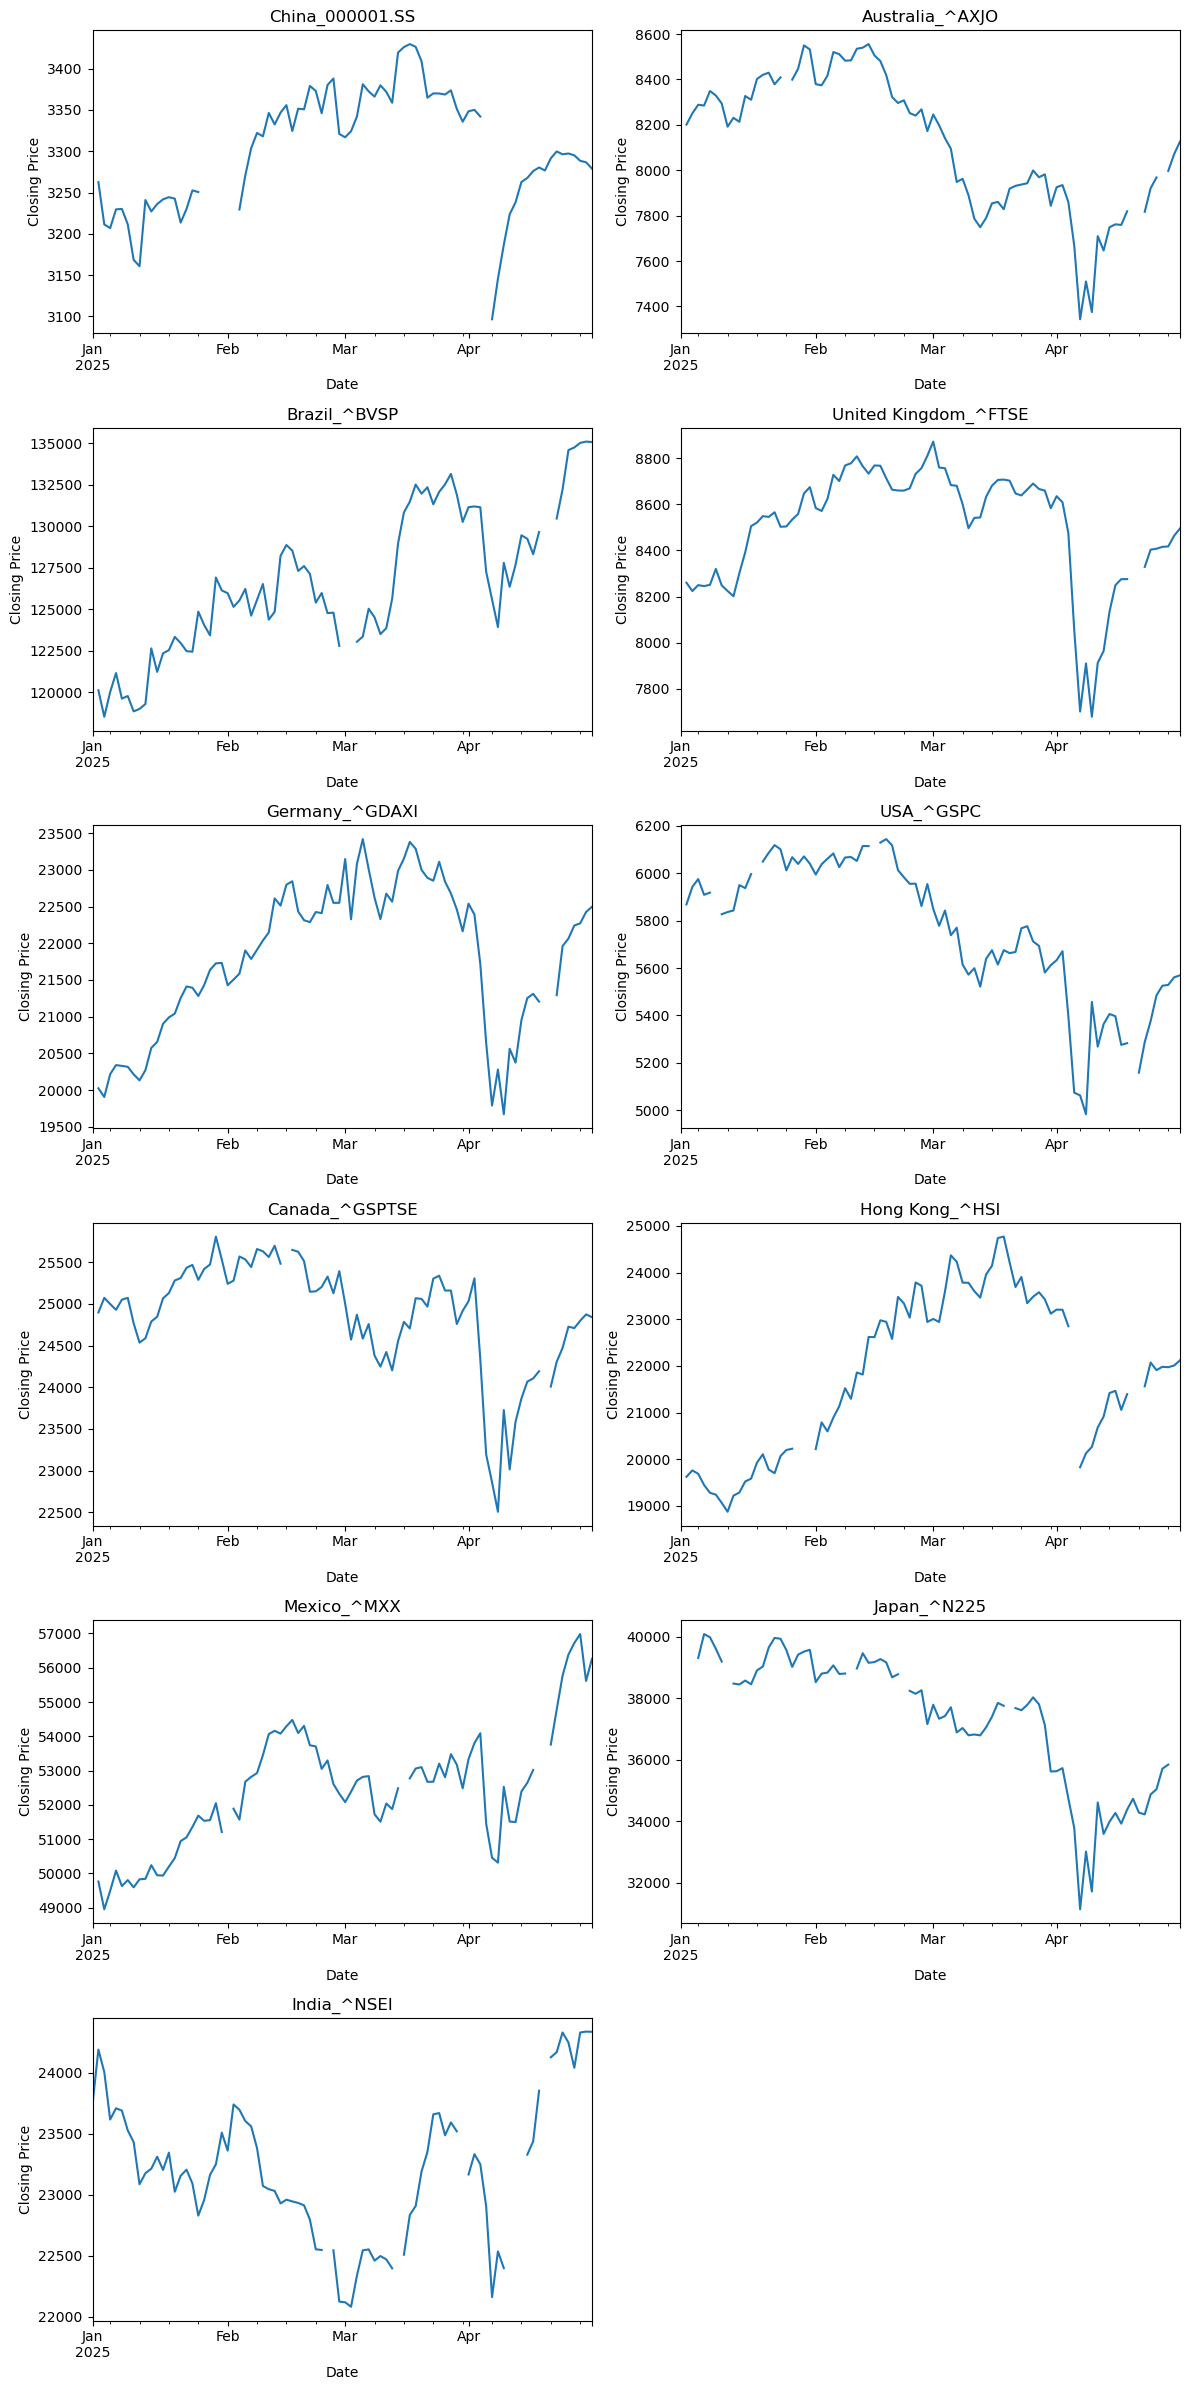

In [14]:

import matplotlib.pyplot as plt

# Get the number of columns (indices)
num_cols = idx_cprice_df.shape[1]

# Determine the number of rows needed for a 2-column layout
num_rows = (num_cols + 1) // 2

# Create the subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(12, num_rows * 4))
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

# Iterate through each column and plot the time series
for i, col in enumerate(idx_cprice_df.columns):
    idx_cprice_df[col].plot(ax=axes[i], title=col)
    axes[i].set_ylabel('Closing Price')
    axes[i].set_xlabel('Date')

# Hide any unused subplots if the number of columns is odd
if num_cols < len(axes):
    for j in range(num_cols, len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout() # Adjust layout to prevent overlapping titles and labels
plt.show()


In [15]:
# YTD stock growth rate
for col in idx_cprice_df.columns:
    first_value = idx_cprice_df.loc[idx_cprice_df[col].first_valid_index(),[col]].values[0]
    last_value = idx_cprice_df.loc[idx_cprice_df[col].last_valid_index(),[col]].values[0]
    growth_rate=((last_value-first_value)/first_value)
    print(f'{col}: {growth_rate:.2%}')

China_000001.SS: 0.50%
Australia_^AXJO: -0.91%
Brazil_^BVSP: 12.44%
United Kingdom_^FTSE: 2.84%
Germany_^GDAXI: 12.35%
USA_^GSPC: -5.10%
Canada_^GSPTSE: -0.23%
Hong Kong_^HSI: 12.72%
Mexico_^MXX: 13.05%
Japan_^N225: -8.30%
India_^NSEI: 2.49%


# Question 3. [Index] S&P 500 Market Corrections Analysis
Calculate the median duration (in days) of significant market corrections in the S&P 500 index.

For this task, define a correction as an event when a stock index goes down by more than 5% from the closest all-time high maximum.

Steps:

* Download S&P 500 historical data (1950-present) using yfinance
* Identify all-time high points (where price exceeds all previous prices)
* For each pair of consecutive all-time highs, find the minimum price in between
* Calculate drawdown percentages: (high - low) / high × 100
* Filter for corrections with at least 5% drawdown
* Calculate the duration in days for each correction period
* Determine the 25th, 50th (median), and 75th percentiles for correction durations

Context:

```
Investors often wonder about the typical length of market corrections when deciding "when to buy the dip" (Reddit discussion).
A Wealth of Common Sense - How Often Should You Expect a Stock Market Correction?
```



**Hint (use this data to compare with your results)**: Here is the list of top 10 largest corrections by drawdown:

* 2007-10-09 to 2009-03-09: 56.8% drawdown over 517 days
* 2000-03-24 to 2002-10-09: 49.1% drawdown over 929 days
* 1973-01-11 to 1974-10-03: 48.2% drawdown over 630 days
* 1968-11-29 to 1970-05-26: 36.1% drawdown over 543 days
* 2020-02-19 to 2020-03-23: 33.9% drawdown over 33 days
* 1987-08-25 to 1987-12-04: 33.5% drawdown over 101 days
* 1961-12-12 to 1962-06-26: 28.0% drawdown over 196 days
* 1980-11-28 to 1982-08-12: 27.1% drawdown over 622 days
* 2022-01-03 to 2022-10-12: 25.4% drawdown over 282 days
* 1966-02-09 to 1966-10-07: 22.2% drawdown over 240 days

In [16]:
# SP500 historical data
sp500_his = yf.download('^GSPC',start='1950-01-01',end='2025-05-30')['Close']
sp500_his.columns=["".join(col) for col in sp500_his.columns]
sp500_his['Cumulative Max'] = sp500_his['^GSPC'].cummax()
sp500_his['Max Change?'] = sp500_his['Cumulative Max'].shift(1)<sp500_his['Cumulative Max']


[*********************100%***********************]  1 of 1 completed


In [17]:
# generate a dataframe of correction periods
max_change_df = sp500_his[sp500_his['Max Change?']].index.to_list()
placeholder = list()
for current, next_ in zip(max_change_df,max_change_df[1:]):
    prev_date = current
    next_date = next_
    change_period = sp500_his.loc[prev_date:next_date,:]

    placeholder.append({
        'prev_peak_date': prev_date.date(),
        'drawndown_date': change_period['^GSPC'].idxmin().date(),
        'prev_max':  change_period.loc[prev_date,['^GSPC']].values[0],
        'min_price': change_period['^GSPC'].min(),
        'drawndown_days': (change_period['^GSPC'].idxmin() - prev_date).days
    })
market_correction_df = pd.DataFrame(placeholder)
market_correction_df['drawndown_percentage%'] = round((market_correction_df['prev_max'] - market_correction_df['min_price'])/market_correction_df['prev_max']*100,2)

In [18]:
# over 5% drawdown
drawndown_5pt = market_correction_df.loc[market_correction_df['drawndown_percentage%']>=5]
print('median of significant drawndown days:')
print(drawndown_5pt['drawndown_days'].median())
print('top drawndown percentage')
print(drawndown_5pt[['prev_peak_date','drawndown_date','drawndown_percentage%','drawndown_days']].nlargest(10,'drawndown_percentage%').to_markdown(index=False))

median of significant drawndown days:
39.0
top drawndown percentage
| prev_peak_date   | drawndown_date   |   drawndown_percentage% |   drawndown_days |
|:-----------------|:-----------------|------------------------:|-----------------:|
| 2007-10-09       | 2009-03-09       |                   56.78 |              517 |
| 2000-03-24       | 2002-10-09       |                   49.15 |              929 |
| 1973-01-11       | 1974-10-03       |                   48.2  |              630 |
| 1968-11-29       | 1970-05-26       |                   36.06 |              543 |
| 2020-02-19       | 2020-03-23       |                   33.92 |               33 |
| 1987-08-25       | 1987-12-04       |                   33.51 |              101 |
| 1961-12-12       | 1962-06-26       |                   27.97 |              196 |
| 1980-11-28       | 1982-08-12       |                   27.11 |              622 |
| 2022-01-03       | 2022-10-12       |                   25.43 |              282

# Question 4. [Stocks] Earnings Surprise Analysis for Amazon (AMZN)

Calculate the median 2-day percentage change in stock prices following positive earnings surprises days.

Steps:

* Load earnings data from CSV (ha1_Amazon.csv) containing earnings dates, EPS estimates, and actual EPS
* Download complete historical price data using yfinance
* Calculate 2-day percentage changes for all historical dates: for each sequence of 3 consecutive trading days (Day 1, Day 2, Day 3), compute the return as Close_Day3 / Close_Day1 - 1. (Assume Day 2 may correspond to the earnings announcement.)
* Identify positive earnings surprises (where "actual EPS > estimated EPS" OR "Surprise (%)>0")
* Calculate 2-day percentage changes following positive earnings surprises
* Compare the median 2-day percentage change for positive surprises vs. all historical dates

Context:

`Earnings announcements, especially when they exceed analyst expectations, can significantly impact stock prices in the short term.`

Reference: Yahoo Finance earnings calendar - https://finance.yahoo.com/calendar/earnings?symbol=AMZN


In [19]:
# read earning data
amz_earning = pd.read_csv('./data/ha1_Amazon.csv',delimiter=";")

# transform data types of the amazon earning dataset
amz_earning['Earnings Date'] = amz_earning['Earnings Date'].str.split(' at').str[0]
amz_earning['Earnings Date'] = pd.to_datetime(amz_earning['Earnings Date'])

In [20]:
# filter out '-' Surprise % values
amz_earning = amz_earning[amz_earning['Surprise (%)']!='-']
amz_earning['Reported EPS'] = amz_earning['Reported EPS'].replace('-','')
amz_earning['EPS Estimate'] = amz_earning['EPS Estimate'].replace('-','')
amz_earning['Reported EPS'] = amz_earning['Reported EPS'].str.replace(r'(\?\?\?)', '', regex=True)
amz_earning['EPS Estimate'] = amz_earning['EPS Estimate'].str.replace(r'(\?\?\?)', '', regex=True)
amz_earning['Surprise (%)'] = pd.to_numeric(amz_earning['Surprise (%)'])
amz_earning['Reported EPS'] = pd.to_numeric(amz_earning['Reported EPS'])
amz_earning['EPS Estimate'] = pd.to_numeric(amz_earning['EPS Estimate'])

In [22]:
amz_earning_eps = amz_earning[amz_earning['Reported EPS']> amz_earning['EPS Estimate']]
amz_earning_surprise = amz_earning[amz_earning['Reported EPS'].isna() & (amz_earning['Surprise (%)']>0)]
amz_earning_positive = pd.concat([amz_earning_eps,amz_earning_surprise],axis=0)

In [24]:
# load historical stock prices of amazon
amz_price = yf.download('AMZN',multi_level_index=False)[['Close']]
amz_price['Percentage_change_2Day%'] = round((amz_price['Close']/amz_price['Close'].shift(2)-1)*100,2)

[*********************100%***********************]  1 of 1 completed


In [28]:
amz_pe=pd.merge(amz_price,amz_earning_positive[['Earnings Date','Surprise (%)']],left_index = True, right_on='Earnings Date', how='left').set_index(amz_price.index)
amz_pe['Positive Surprise(Y/N)'] = np.where(amz_pe['Surprise (%)'].isna(),False,True)
amz_pe['2-day positive surpise'] = amz_pe['Percentage_change_2Day%'].shift(-1)
amz_pe.head()

,Close,Percentage_change_2Day%,Earnings Date,Surprise (%),Positive Surprise(Y/N),2-day positive surpise
Date,,,,,,
1997-05-15,0.097917,NaN,1997-05-15,NaN,False,NaN
1997-05-16,0.086458,NaN,1997-05-16,NaN,False,-12.77
1997-05-19,0.085417,-12.77,1997-05-19,NaN,False,-5.42
1997-05-20,0.081771,-5.42,1997-05-20,NaN,False,-16.46
1997-05-21,0.071354,-16.46,1997-05-21,NaN,False,-14.65


In [ ]:
# Percentage change for all historical dates and earning days of positive surprise
print(f'Percentage_change_2Day% of historical dates: {amz_pe["Percentage_change_2Day%"].median()}')
print(f'Percentage_change_2Day% of positive earnings: {amz_pe.loc[amz_pe["Positive Surprise(Y/N)"]==True ,"2-day positive surpise"].median()}')

Percentage_change_2Day% of historical dates: 0.16
Percentage_change_2Day% of positive earnings: 2.635
